In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("HMDH_combined_ligand_SMILES.csv")

In [3]:
df.head()

,Unnamed: 0,Molecule_Name,SMILES,Ligand
0,0,CHEMBL298482,O=C1C[C@H](O)C[C@@H](/C=C/c2c(Cl)cc(Cl)cc2OCc2...,actives
1,1,CHEMBL298482,O=C1C[C@H](O)C[C@H](/C=C/c2c(Cl)cc(Cl)cc2OCc2c...,actives
2,2,CHEMBL250383,CC(C)c1c(C(=O)N(C)CC2CCCCC2)nn(-c2ccc(F)cc2)c1...,actives
3,3,CHEMBL250382,CCCCNC(=O)c1nn(-c2ccc(F)cc2)c(OC[C@@H](O)C[C@@...,actives
4,4,CHEMBL107753,Cc1ccc(C2CCCCC2)n1CC[C@@H]1C[C@@H](O)CC(=O)O1,actives


In [16]:
df.set_index("Molecule_Name", inplace=True)

In [44]:
df = df.drop("Unnamed: 0", axis=1)

In [47]:
df = df.reset_index()

In [60]:
from rdkit import Chem
from rdkit.Chem import AllChem

In [61]:
def smiles_to_fingerprint(smiles, radius=2, n_bits=2048):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits)
    else:
        return None

In [70]:
df['Fingerprint'] = df['SMILES'].apply(smiles_to_fingerprint)

[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerat

[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerat

[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerat

[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerator
[17:12:08] DEPRECATION WARNING: please use MorganGenerat

In [71]:
# Remove rows where the fingerprint generation failed (returns None)
df = df[df['Fingerprint'].notnull()]

In [72]:
X = list(df['Fingerprint'].apply(lambda x: list(x)))

In [63]:
y = df['Ligand'].apply(lambda x: 1 if x == 'actives' else 0)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [76]:
rfc = RandomForestClassifier(n_estimators=100, random_state=101)

In [77]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=101)

In [78]:
preds = rfc.predict(X_test)

In [95]:
from sklearn.metrics import classification_report, confusion_matrix

In [82]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       886
           1       1.00      1.00      1.00        33

    accuracy                           1.00       919
   macro avg       1.00      1.00      1.00       919
weighted avg       1.00      1.00      1.00       919



In [93]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [94]:
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

In [96]:
cm = confusion_matrix(y_test, preds)

In [100]:
disp = ConfusionMatrixDisplay(cm)

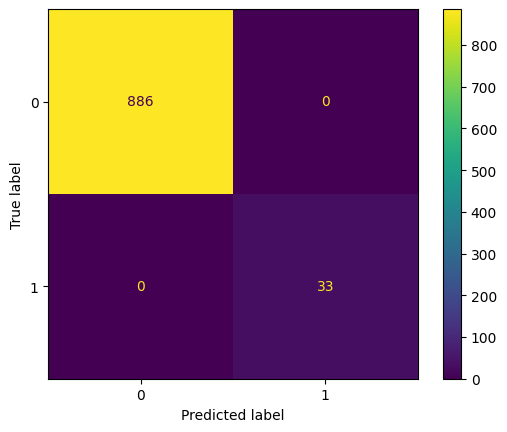

In [101]:
disp.plot()